In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/internetdisabledpackage/tqdm-4.66.1-py3-none-any.whl
/kaggle/input/internetdisabledpackage/joblib-1.3.2-py3-none-any.whl
/kaggle/input/internetdisabledpackage/pandas-2.1.4-cp311-cp311-win_amd64.whl
/kaggle/input/internetdisabledpackage/nltk-3.8.1-py3-none-any.whl
/kaggle/input/internetdisabledpackage/regex-2023.12.25-cp311-cp311-win_amd64.whl
/kaggle/input/internetdisabledpackage/kiwisolver-1.4.5-cp311-cp311-win_amd64.whl
/kaggle/input/internetdisabledpackage/scipy-1.11.4-cp311-cp311-win_amd64.whl
/kaggle/input/internetdisabledpackage/six-1.16.0-py2.py3-none-any.whl
/kaggle/input/internetdisabledpackage/contourpy-1.2.0-cp311-cp311-win_amd64.whl
/kaggle/input/internetdisabledpackage/cycler-0.12.1-py3-none-any.whl
/kaggle/input/internetdisabledpackage/packaging-23.2-py3-none-any.whl
/kaggle/input/internetdisabledpackage/pytz-2023.3.post1-py2.py3-none-any.whl
/kaggle/input/internetdisabledpackage/pillow-10.2.0-cp311-cp311-win_amd64.whl
/kaggle/input/internetdisabledpackage/p

In [2]:
test_data = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
train_data = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')
train_data.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [3]:
!pip install textstat --no-index --find-links /kaggle/input/internetdisabledpackage

Looking in links: /kaggle/input/internetdisabledpackage
Processing /kaggle/input/internetdisabledpackage/textstat-0.7.3-py3-none-any.whl
Processing /kaggle/input/internetdisabledpackage/pyphen-0.14.0-py3-none-any.whl (from textstat)


since in kaggle pip don,t work in submission so commented the lexical richness feature which measures text diversity 

In [4]:
#!pip install lexicalrichness --no-index --find-links /kaggle/input/internetdisabledpackage/lexicalrichness-0.5.1

In [5]:
import tensorflow as tf
import nltk
from collections import Counter
from textblob import TextBlob
#from lexicalrichness import LexicalRichness
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# external dataset for llm generated detection as kaggle train data is high imbalanced
daigt_data= pd.read_csv("/kaggle/input/daigt-external-train-dataset/train_external_drcat_02.csv",low_memory =False)

    

In [7]:
daigt_data.head()

,essay_id,text,label,source,prompt
0,sakibsh-llm-0,"I just got back from your class, so I decided ...",0.0,sakibsh-llm-human-1,NaN
1,sakibsh-llm-1,It is 9:35 and I am beginning my stream of con...,0.0,sakibsh-llm-human-1,NaN
2,sakibsh-llm-2,Not only was the server down but it has taken ...,0.0,sakibsh-llm-human-1,NaN
3,sakibsh-llm-3,I am not exactly sure how this is supposed to ...,0.0,sakibsh-llm-human-1,NaN
4,sakibsh-llm-4,"Well, here I am on Friday, September something...",0.0,sakibsh-llm-human-1,NaN


In [8]:
# extracting columns of text and label from train_data and external dataset
df1 = train_data.drop(['id','prompt_id'],axis =1)
daigt_data.rename(columns = {'label':'generated'}, inplace = True)
df2 = daigt_data.drop(['essay_id','source','prompt'],axis=1)


In [9]:
# concatinating data and shuffling the data using sample
train = pd.concat([df1,df2],ignore_index=True)
train =train.sample(n= len(train))


In [10]:
train.head()

,text,generated
11130,Play: The Importance in People’s Life Essay\n\...,NaN
187764,"-The gym goes dark as the lights shut off, and...",NaN
67404,The Middle East’s Impediments and Opportunitie...,NaN
139488,"**I'm learning for the IELTS exam. Please, hel...",NaN
107444,Tough Choices: A Memoir Essay (Book Review)\n\...,NaN


In [11]:
# removing rows of na values , approx 9k rows are there after drop
train =train.dropna()



In [12]:
train.isnull().sum()


text         0
generated    0
dtype: int64

<Axes: xlabel='generated'>

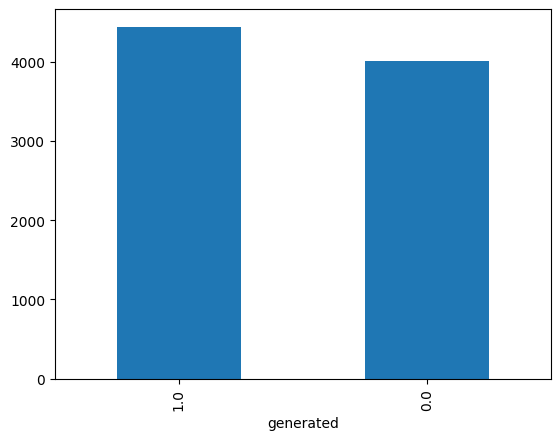

In [13]:
train.generated.value_counts().plot(kind='bar')

In [14]:
import nltk


In [1]:
#average sent length - sentence tokenization and word tokenization using nltk and counting sent len and word len and dividing them
#text diversity -lexical richness provide mtld(measure of textual lexical diversity). text with high mtld value are more lexically diverse
#punctuation counting as ai generated text make use of less exaclamation and question sigh which make it less formal

def avg_sent_length(text):
    sent = nltk.sent_tokenize(text)
    total_sent = len(sent)
    word =nltk.word_tokenize(text)
    total_word = len(word)
    average_sent_length= total_word/total_sent
    return average_sent_length

#def text_diversity(text):
  #  lex = LexicalRichness(text)
   # return lex.mtld()

def punc_sign(text):
    p =nltk.word_tokenize(text)
    e = [word for word in p if word == '!']
    t = [word for word in p if word == '?']
    s = [word for word in p if word == '&']
    count = len(e)+len(t)+len(s)
    return count







In [16]:
train['avg_sent_length']=train['text'].apply(avg_sent_length)

#train['text_diversity']=train['text'].apply(text_diversity)
train['punc_sign']=train['text'].apply(punc_sign)


In [17]:
#textstat provide many readibility score such as gunning fog, forecast to measure difficulty in reading text
# Gpt0 text detection make use of perplexity and burstiness as human written text are usually not uniform or we can say busty and perplexity deals with the amount of information 
# in the text.Ai text are built on probabilistic models,so it struggle in text where words and phrases have high degree of variance 
from textstat.textstat import textstat
def readibility_score(text):
    score =textstat.flesch_reading_ease(text)
    return score     

def burstiness(text):
    word_counts = Counter(text.split())
    std_dev = np.std(list(word_counts.values()))
    if std_dev == 0:
        burstiness=0
    else:    
        burstiness = len(word_counts) / np.std(list(word_counts.values()))
    return burstiness
def perplexity(text):
    prob_dist = nltk.FreqDist(text.split())
    entropy = -1 * sum([p * np.log(p) for p in prob_dist.values()])
    return np.exp(entropy)
train['perplexity']=train['text'].apply(perplexity)
train['burstiness']=train['text'].apply(burstiness)   
train['readibility_score']=train['text'].apply(readibility_score)

In [18]:

import re

def word_density(text):
    words = re.findall(r'\w+', text)
    word_series = pd.Series(words)
    word_count = word_series.value_counts()
    unique_words = len(word_count)
    return unique_words
train['word_density']=train['text'].apply(word_density)

In [19]:
#functional word include the articles ,pronoun , auxillaiary verbs etc.
from sklearn.feature_extraction.text import CountVectorizer
def func_word_count(text):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    functional_word_count = X.sum()
    return functional_word_count
train['func_word_count']=train['text'].apply(func_word_count)

In [20]:
# frequency distibution is used to record the frequency of each word type in a doc.I have used max frequency of word .
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def freq_dist(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    ar= [frequency[1] for frequency in fdist.items()]
    max_dist= max(ar)
    return max_dist
train['freq_dist']=train['text'].apply(freq_dist)

In [21]:
test_data

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [22]:
#splitting the data with 0.3 test size
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
training_data ,testing_data = train_test_split(train ,test_size = 0.3,random_state = 78)

In [23]:
#apart from these features ,some important features like passive voice count, grammer error , pos count , semantic analysis can be used but it takes more computation
# cost. Since ai generated text are more formal, without grammer error and sometimes without meaning or feeling , so these features are useful.
y_train = training_data['generated'].values
y_test = testing_data['generated'].values
x_train = training_data[['avg_sent_length','punc_sign','readibility_score','burstiness','perplexity','word_density','func_word_count','freq_dist']]
x_test =testing_data[['avg_sent_length','punc_sign','readibility_score','burstiness','perplexity','word_density','func_word_count','freq_dist']]


In [24]:
#lexical richess feature when included then the accuracy is above 96.and roc score 95 approx
# random forest clasifier make much good prediction than other

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)
roc_score = roc_auc_score(y_test,y_pred)
print(roc_score)

0.9541045345185517


In [26]:
test_data['avg_sent_length']=test_data['text'].apply(avg_sent_length)
test_data['func_word_count']=test_data['text'].apply(func_word_count)
test_data['punc_sign']=test_data['text'].apply(punc_sign)
test_data['perplexity']=test_data['text'].apply(perplexity)
test_data['burstiness']=test_data['text'].apply(burstiness)   
test_data['readibility_score']=test_data['text'].apply(readibility_score)
test_data['word_density']=test_data['text'].apply(word_density)
test_data['freq_dist']=test_data['text'].apply(freq_dist)
x = test_data[['avg_sent_length','punc_sign','readibility_score','burstiness','perplexity','word_density','func_word_count','freq_dist']]
predict =rf.predict(x)
    